In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *

In [98]:
d=5
L_total=40000

In [99]:
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (40000, 5)
y: (40000,)


In [121]:
n=1
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A = np.ones((n, n)) / n
print("h_tilde:",h_tilde.shape)

L1 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=3e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=100
)

h_tilde: (1, 40000, 5)


In [122]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A = np.ones((n, n)) / n
print("h_tilde:",h_tilde.shape)

L2 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=3.2e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=100
)

h_tilde: (10, 4000, 5)


In [123]:
n=100
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A = np.ones((n, n)) / n
print("h_tilde:",h_tilde.shape)

L3 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=3e-4,
    sigma_n=0,
    max_it=10000,
    batch_size=100
)

h_tilde: (100, 400, 5)


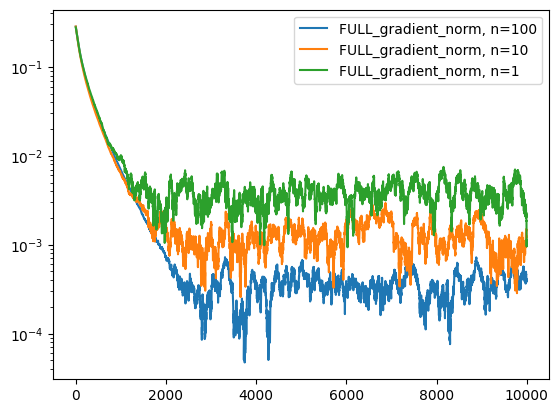

In [125]:
import matplotlib.pyplot as plt
plt.semilogy(L3["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=100")
plt.semilogy(L2["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=10")
plt.semilogy(L1["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=1")
plt.legend()
plt.show()
plt.show()

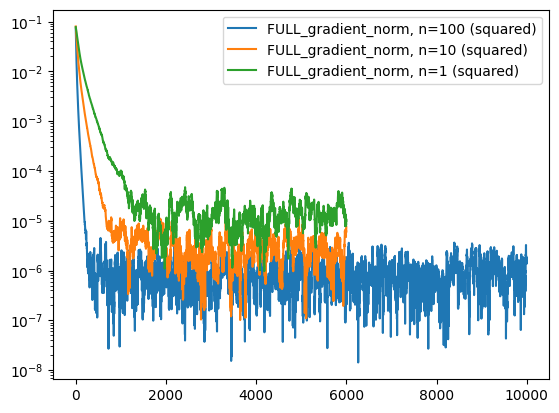

In [96]:
import matplotlib.pyplot as plt

# 假设 L2 和 L1 是包含梯度范数的字典
L2_squared = [x**2 for x in L2["gradient_norm_on_full_trainset"]]
L1_squared = [x**2 for x in L1["gradient_norm_on_full_trainset"]]
L3_squared = [x**2 for x in L3["gradient_norm_on_full_trainset"]]

plt.semilogy(L3_squared, label="FULL_gradient_norm, n=100 (squared)")
plt.semilogy(L2_squared, label="FULL_gradient_norm, n=10 (squared)")
plt.semilogy(L1_squared, label="FULL_gradient_norm, n=1 (squared)")
plt.legend()
plt.show()